<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Spring_2022_Module_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 10
This is in [Chapter 9](https://openstax.org/books/introductory-statistics/pages/9-1-null-and-alternative-hypotheses)


Code Block 1: Load Paired Data 

Code Block 2: Two populations, paired quant

Code Block 3: Load Unpaired data 

Code Block 4: Two Populations, unpaired quant

Code Block 5: Load unpaired data 

Code Block 6: Two Populations, unpaired quant 

In [1]:
### Code Block 1: Load data

world <- read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/World_Population.csv"))
str(world)

'data.frame':	235 obs. of  12 variables:
 $ Rank                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country..or.dependency.: chr  "China" "India" "United States" "Indonesia" ...
 $ Population...2020      : int  1439323776 1380004385 331002651 273523615 220892340 212559417 206139589 164689383 145934462 128932753 ...
 $ Yearly.change          : num  0 0.01 0.01 0.01 0.02 0.01 0.03 0.01 0 0.01 ...
 $ Net.change             : int  5540090 13586631 1937734 2898047 4327022 1509890 5175990 1643222 62206 1357224 ...
 $ Density.P.Km.2         : int  153 464 36 151 287 25 226 1265 9 66 ...
 $ Land.Area..Km.2.       : int  9388211 2973190 9147420 1811570 770880 8358140 910770 130170 16376870 1943950 ...
 $ Migrants..net.         : int  -348399 -532687 954806 -98955 -233379 21200 -60000 -369501 182456 -60000 ...
 $ Fert..Rate             : chr  "1.70" "2.20" "1.80" "2.30" ...
 $ Med..Age               : chr  "38.00" "28.00" "38.00" "30.00" ...
 $ Urban.Pop..            : chr  "0.61" "0.35" "0.83

We are 95% confident the actual mean is between 230299.4 and 578958.3.
The p-value of this test is 1.34398e-05 which is like flipping 16 coins and getting all heads.


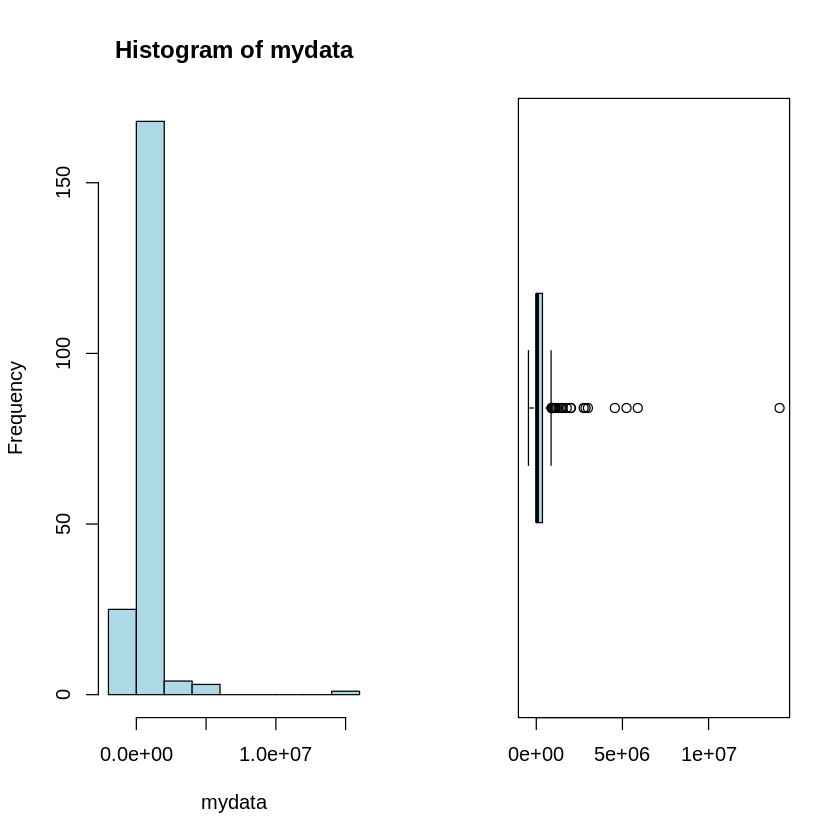

In [2]:
#### Code Block 2: Two Population 

### Step 1: Gather Data & Hypotheses
#Enter Data & Declare the null & alternative hypotheses.


mydata = world$Net.change - world$Migrants..net.
mydata = subset(mydata, !is.na(mydata))

#mydata = c(1,0,2,3,2,4,5,6,9,5)

### null and alternative hypotheses for two paired populations
m0=10000   #If doing a single t-test on two paired population. 
testtype="two.sided"  # "two.sided" or "less" or "greater" 

### Step 2: Analyze the data
res <- t.test(mydata, mu=m0, alternative=testtype)

par(mfrow=c(1,2))
hist(mydata, col="light blue")
boxplot(mydata, horizontal=T, col="light blue")

#### Step 3: Interpret results 
cat(sep="","We are 95% confident the actual mean is between ",res$conf.int[1]," and ", res$conf.int[2],".\n")
pval = res$p.value
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")

In [13]:
### Code Block 3: Load Data 

mlb = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/sportsref_download_2.csv"))
str(mlb)


'data.frame':	147 obs. of  20 variables:
 $ Year       : int  2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 ...
 $ Tms        : int  20 30 30 30 30 30 30 30 30 30 ...
 $ G          : int  75 2429 898 2429 2431 2430 2428 2429 2430 2431 ...
 $ Time       : chr  "3:11" "3:11" "3:06" "3:10" ...
 $ Time.9I    : chr  "3:09" "3:10" "3:07" "3:05" ...
 $ Inn        : int  5 216 68 208 216 182 185 212 232 243 ...
 $ Inn.       : num  6.67 8.89 7.57 8.56 8.89 7.49 7.62 8.73 9.55 10 ...
 $ R.G        : num  8.47 9.06 9.29 9.66 8.9 9.29 8.96 8.5 8.13 8.33 ...
 $ PA.G       : num  74.7 74.8 74 76.8 76.1 76.2 76 75.6 75.7 76 ...
 $ Pitches.PA : num  3.93 3.91 3.97 3.93 3.9 3.89 3.88 3.83 3.83 3.84 ...
 $ Batters.G  : num  10.3 10.3 10.4 10.3 10.4 10.3 10.4 10.4 10.3 10.3 ...
 $ Pitchers.G : num  4.97 4.43 4.43 4.41 4.36 4.22 4.15 4.11 3.98 3.95 ...
 $ PH.G       : num  0.65 1.22 0.65 1.18 1.16 1.13 1.12 1.16 1.14 1.12 ...
 $ PR.G       : num  0.18 0.13 0.23 0.14 0.16 0.15 0.16 0.18 0.17 0.17 ...


In [16]:
#### Code Block 4:

### Step 1: Gather Data & Hypotheses
#Enter Data & Declare the null & alternativ


df_1 = subset(mlb, Pitches.PA <4)
df_2 = subset(mlb, Pitchers.G < 4)

data_1 = df_1$Pitches.PA 
data_2 = df_2$Pitchers.G

data_1 = subset(data_1, !is.na(data_1))
data_2 = subset(data_2, !is.na(data_2))


### null hypothesis for single population (if applicable)
#m0=84.5   #If doing a single t-test on one population. 

### significance test for null hypothesis 

res <- t.test(data_1, data_2, alternative="two.sided", var.equal = TRUE)     # test 1
#res <- t.test(data_1, mu=m0, alternative="two.sided")                       # test 2  (requires a null hypothesis as m0)


### Start interpretting results 
cat(sep="","We are 95% confident the difference in means is between ",res$conf.int[1]," and ", res$conf.int[2],".\n")
pval = res$p.value
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")

### Final interpetation is up to you. Do you have sufficient evidence to reject the null hypothesis? (Was the s-value surprising?)



We are 95% confident the difference in means is between 1.036309 and 1.616939.
The p-value of this test is really tiny which is like flipping 49 coins and getting all heads.


In [17]:
insurance = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/AHRQ%20Reasons%20Difficulty%20Care.csv"))
str(insurance)


'data.frame':	16 obs. of  4 variables:
 $ Year             : int  2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 ...
 $ Cannot.afford    : int  3135 3625 4174 5274 6940 7226 6778 7116 7607 6314 ...
 $ Insurance.related: int  2228 1923 2405 2044 1852 1555 1287 1739 1522 1655 ...
 $ Other            : int  7919 7671 7451 6445 6681 6056 5990 5610 6123 6072 ...


Year Chosen: 2014 2002 

We are 95% confident the population proportion is between -0.02394104 and -0.001446301.
The p-value of this test is 0.02696832 which is like flipping 5 coins and getting all heads.


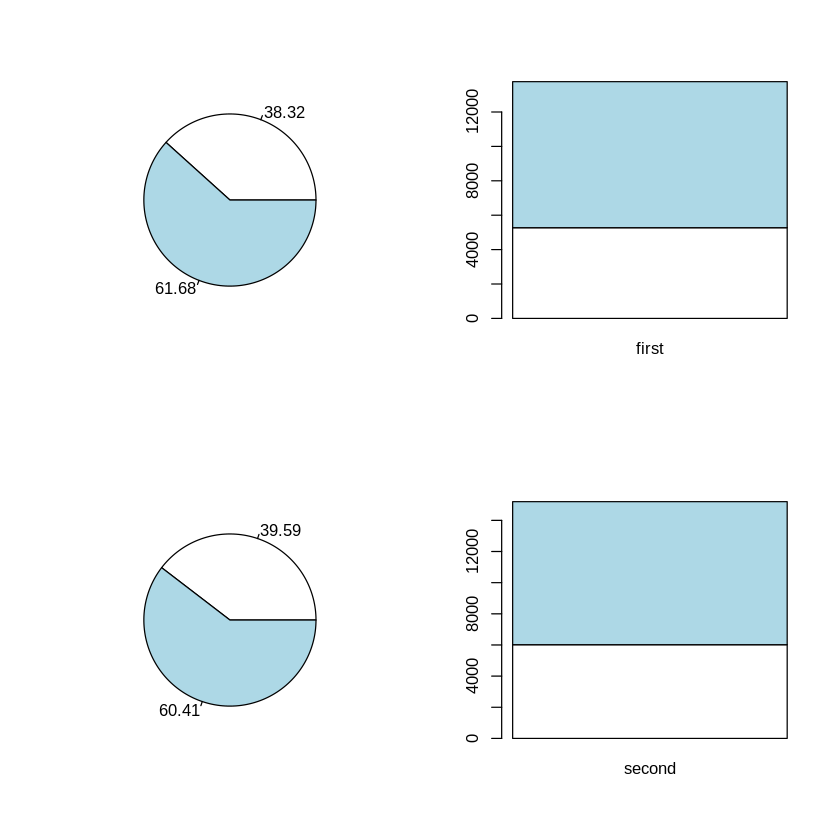

In [20]:
#### Code Block 4: One Population, Qualitative Data

### Step 1: Gather Data & Hypotheses
#Enter Data & Declare the null & alternativ

year = sample(2002:2017,2)
cat("Year Chosen:", year, "\n\n")
pick1 = subset(insurance, Year == year[1])
pick2 = subset(insurance, Year == year[2])

count1 = pick1$Cannot.afford 
#count1 = 0

total1 = pick1$Cannot.afford + pick1$Insurance.related + pick1$Other
#total1 = 18

count2 = pick2$Cannot.afford 
#count2 = 0 

total2 = pick2$Cannot.afford + pick2$Insurance.related + pick2$Other 
#total2 = 25


testtype="two.sided"   # "two.sided" or "less" or "greater" depending on your alternative hypothesis

#### Step 2: format data for R
count_comp1=total1-count1
first = c(count1,count_comp1)
labs1=round(first/total1*100,2)


data_1 = rep(c(1,0), c(count1, count_comp1))

combined = data.frame(first)

count_comp2=total2-count2
second = c(count2,count_comp2)
labs2=round(second/total2*100,2)


data_2 = rep(c(1,0), c(count2, count_comp2))

combined = data.frame(first, second)


#### Step 3: analyze data

par(mfrow=c(2,2))
pie(combined$first, labels=labs1)
barplot(cbind(first), col=c("white", "light blue"), ylim=c(0,total1))

pie(combined$second, labels=labs2)
barplot(cbind(second), col=c("white", "light blue"), ylim=c(0,total2))

res <- t.test(data_1, data_2, alternative=testtype, var.equal = TRUE)  #https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/t.test

#### Code Block 3: Interpret results 
cat(sep="","We are 95% confident the population proportion is between ",res$conf.int[1]," and ", res$conf.int[2],".\n")
pval = res$p.value
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")
